In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import sklearn
import sklearn.tree

from sklearn.naive_bayes     import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import f1_score
from sklearn.ensemble        import BaggingClassifier
from sklearn.multiclass      import OneVsRestClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import average_precision_score

In [2]:
DF = pd.read_csv("student-mat.csv")

In [3]:
DF.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
DF.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
DF = DF[DF.age < 20]

In [6]:
# Para simplificar la categorización, se han unido el consumo entre semana y del fin de semana
DF["Alc"] = DF[["Dalc", "Walc"]].max(axis=1)
DF = DF.drop(columns=["Dalc", "Walc"])

In [7]:
# Convertimos los datos en numéricos

DF = DF.apply(LabelEncoder().fit_transform)

In [8]:
# Nos concentramos en el el tipo de consumo de alcohol (moderado-sin moderación) en vez de las subcategorías planteadas por el conjunto de datos

DF["Alc"].replace({1:0,2:0,3:1,4:1}, inplace=True)

In [9]:
DF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,Alc
0,0,0,3,1,0,0,4,4,0,4,...,0,3,2,3,2,6,2,3,3,0
1,0,0,2,1,0,1,1,1,0,2,...,0,4,2,2,2,4,2,2,3,0
2,0,0,0,1,1,1,1,1,0,2,...,0,3,2,1,2,10,4,5,7,0
3,0,0,0,1,0,1,4,2,1,3,...,1,2,1,1,4,2,12,11,12,0
4,0,0,1,1,0,1,3,3,2,2,...,0,3,2,1,4,4,3,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0,3,1,1,1,3,1,4,3,...,0,3,2,3,0,0,4,6,5,0
389,1,0,3,1,0,1,1,1,2,2,...,0,0,0,0,4,0,3,2,0,0
391,1,1,2,1,1,1,3,1,3,3,...,0,1,3,4,1,3,11,13,13,1
393,1,1,3,0,1,1,3,2,3,2,...,0,3,3,0,4,0,8,9,7,1


In [10]:
clase = DF["Alc"]

In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(DF.loc[:, DF.columns!='Alc'], clase, test_size=0.2, random_state=0)

In [12]:
for i in range(2,19):
    
    modelo = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    modelo = modelo.fit(xTrain,yTrain)
    yPred = modelo.predict(xTest)
    print(i, metrics.accuracy_score(yTest,yPred))
    print(metrics.classification_report(yTest,yPred,labels=np.unique(yPred))+"\n")

2 0.8333333333333334
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        61
           1       0.61      0.65      0.63        17

    accuracy                           0.83        78
   macro avg       0.76      0.77      0.76        78
weighted avg       0.84      0.83      0.84        78


3 0.782051282051282
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        61

   micro avg       0.78      1.00      0.88        61
   macro avg       0.78      1.00      0.88        61
weighted avg       0.78      1.00      0.88        61


4 0.782051282051282
              precision    recall  f1-score   support

           0       0.80      0.97      0.87        61
           1       0.50      0.12      0.19        17

    accuracy                           0.78        78
   macro avg       0.65      0.54      0.53        78
weighted avg       0.73      0.78      0.73        78


5 0.74358

In [13]:
modelo = DecisionTreeClassifier(criterion="entropy", max_depth=2)
modelo = modelo.fit(xTrain,yTrain)

In [14]:
yPred = modelo.predict(xTest)

In [15]:
metrics.accuracy_score(yTest,yPred)

0.8333333333333334

In [16]:
print(metrics.classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        61
           1       0.61      0.65      0.63        17

    accuracy                           0.83        78
   macro avg       0.76      0.77      0.76        78
weighted avg       0.84      0.83      0.84        78



In [17]:
arbolTexto = sklearn.tree.export_text(modelo, feature_names=list(DF.columns[:-1]))

In [18]:
print(arbolTexto)

|--- goout <= 2.50
|   |--- G3 <= 10.50
|   |   |--- class: 0
|   |--- G3 >  10.50
|   |   |--- class: 0
|--- goout >  2.50
|   |--- sex <= 0.50
|   |   |--- class: 0
|   |--- sex >  0.50
|   |   |--- class: 1



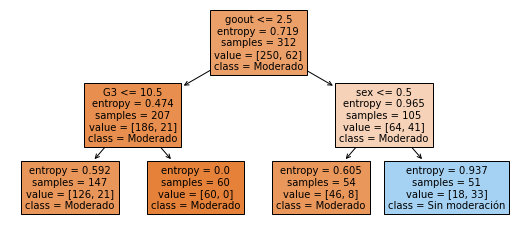

In [19]:
fig = plt.figure(figsize=(9,4))
var = sklearn.tree.plot_tree(modelo, 
                             feature_names=list(DF.columns),
                             filled=True,
                             fontsize=10,
                             class_names=["Moderado","Sin moderación"])
plt.savefig("arbolClase.png")

In [20]:
DF = pd.read_csv("student-mat.csv")
DF = DF[DF.age < 20]
DF["Alc"] = DF[["Dalc", "Walc"]].max(axis=1)
DF = DF.drop(columns=["Dalc", "Walc"])
DF = DF.apply(LabelEncoder().fit_transform)
DF["Alc"].replace({1:0,2:0,3:1,4:1}, inplace=True)

In [21]:
DF.describe

<bound method NDFrame.describe of      school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0    3        1        0        0     4     4     0     4  ...   
1         0    0    2        1        0        1     1     1     0     2  ...   
2         0    0    0        1        1        1     1     1     0     2  ...   
3         0    0    0        1        0        1     4     2     1     3  ...   
4         0    0    1        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
388       1    0    3        1        1        1     3     1     4     3  ...   
389       1    0    3        1        0        1     1     1     2     2  ...   
391       1    1    2        1        1        1     3     1     3     3  ...   
393       1    1    3        0        1        1     3     2     3     2  ...   
394       1    1    4        1        1        1     1     1     2     0  .

In [22]:
X = DF.iloc[:,:31]
y = DF.iloc[:,31]

In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

In [24]:
cnb = CategoricalNB()
cnb.fit(xTrain,yTrain)
yPred = cnb.predict(xTest)

In [25]:
metrics.accuracy_score(yTest,yPred)

0.7948717948717948

In [26]:
print(metrics.classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.58      0.39      0.47        18

    accuracy                           0.79        78
   macro avg       0.71      0.65      0.67        78
weighted avg       0.78      0.79      0.78        78



In [27]:
DF = pd.read_csv("student-mat.csv")
DF = DF[DF.age < 20]
DF["Alc"] = DF[["Dalc", "Walc"]].max(axis=1)
DF = DF.drop(columns=["Dalc", "Walc"])
DF = DF.apply(LabelEncoder().fit_transform)
DF["Alc"].replace({1:0,2:0,3:1,4:1}, inplace=True)

In [28]:
x = DF.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [29]:
X_train, X_vt, y_train, y_vt = train_test_split(x_scaled,df[3],test_size=.30)
X_val, X_test, y_val, y_test = train_test_split(X_vt,y_vt,test_size=.50)

In [30]:
k_F1 = []
kRange = [1,3,5]

for k in kRange:
        
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    k_F1.append(f1_score(y_val, y_pred))

list(zip(kRange,k_F1))

[(1, 0.9166666666666666), (3, 0.92), (5, 0.9484536082474228)]

In [31]:
laben = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if DF.dtypes[c] == object:
            laben.fit(DF[c].astype(str))
            DF[c] = laben.transform(DF[c].astype(str))
    return DF

Y = DF["Alc"]
X = DF = DF.drop(columns=["Alc"])

DF = FunLabelEncoder(DF)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

#Modelo SVM
svm = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), n_jobs=-1))
#Entrenando modelo
svm.fit(X_train, Y_train)
#Prediciendo los valores del target
Y_predict2 = svm.predict(X_test)

#Accuracy
test_svm = round(svm.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_svm = round(svm.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

model = (test_svm, train_svm)
print('accuracy:', model)
#Precision-recall
average_precision = average_precision_score(Y_test, Y_predict2)
print('precision-recall:', average_precision)

accuracy: (83.05, 90.03)
precision-recall: 0.2986440677966101
